<a href="https://colab.research.google.com/github/barauna-lo/Mathematical-physics/blob/main/CAP422_FISMAT_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# CAP-422: Física Estatística Comptacional

* Luan Orion Baraúna 




# FUNÇÃO	ZETA	E	A	HIPÓTESE	DE	RIEMANN


HANDS-­‐ON DO TRABALHO

Use o `SymPy` e `mpmath` para verificação computacional de algumas
propriedades da função zeta. as quantidades acima. O `mpmath` é uma biblioteca Python pura para números de precisão arbitrária. Ele é usado pelo `SymPy` nos bastidores, mas será mais fácil usá‐lo explicitamente nesse hands-­‐on. O trabalho consiste em montar um notebook, processar os módulos a seguir e obter os resultados esperados.

## Módulo	1:
Importações


In [27]:
from sympy import *
import mpmath 
import numpy as np
import matplotlib.pyplot as plt
s = symbols('s')

##Módulo 2:

Defina a função zeta

In [8]:
Z = pi**(-s/2)*gamma(s/2)*zeta(s)
Z

## Módulo 3: 

Verifque  que  a  parte  imaginária  é  irrelevante  diante  da  parte   real para $s=1/2 + jt$ (ex. $=1/2$)

In [10]:
Z.subs(s, 1/2 + 0.5j).evalf()

-1.97702795164031 + 5.49690501450151e-17*I

## Módulo	4:		
Defina	a	derivada	logaritmo	$(D)$ de $Z$	como	

$$ 
\frac{\text{polygamma}(0,\frac{s}{2})}{2} - \frac{\log(\pi)}{2} + \frac{\zeta'(s)}{\zeta(s)} 
$$

onde a função $\text{polygamma}$ é a derivada da função gamma.

In [11]:
D = simplify(Z.diff(s)/Z)
D

polygamma(0, s/2)/2 - log(pi)/2 + Derivative(zeta(s), s)/zeta(s)

## Módulo  5:  

Use `lambdify`  para  converter  as  expressões  `SymPy`  para  $Z$  e  $D$  em   funções que são avaliadas usando `mpmath`. Uma dificuldade técnica aqui é que a   derivada  da  função  zeta $\zeta(s)$  não  tem  uma  expressão  de  forma  fechada.  

O  $\zeta(s)$  do `mpmath` não  funciona  com `sympy.lambdify`  (veja  o  [issue 11802  do  SymPy](https://www.asmeurer.com/blog/posts/verifying-the-riemann-hypothesis-with-sympy-and-mpmath/). 

Portanto,  temos  que  definir  manualmente  "Derivative"  em  `lambdify`,  sabendo   que  será  a  derivada  de $\zeta(s)$  quando  for  chamada.  

Esteja  ciente  de  que  isso  é   correto  apenas  para  esta  expressão  específica  onde  sabemos  que Derivative é para (zeta(s), s).

In [12]:
Z_func = lambdify(s,Z,'mpmath')
D_func = lambdify(s,D, modules =['mpmath',
  {'Derivative':lambda expr,z :mpmath.zeta(z,derivative=1)}])

## Módulo	6:		
Usando	`mpmath.quad`	para	contorno	e	o	parâmetro	maxdegree	para	aumentar	o	grau	de	quadratura	no	espaço	complexo.

In [19]:
def argument_count(func, N, maxdegree = 6):
  return 1/(2*mpmath.pi*1j)*(mpmath.quad(func,

         [1+0.1j,  1 + N*1j  , 0+ N*1j, 0 + 0.1j, 1+ 0.1j], maxdegree=maxdegree))

## Módulo	7: 		
Testando	a	contagem	de	zeros	para	$s^2 – s	+1/2$ (com	quadratura	$N=10$		

Ex.	Abaixo	(isso	não	aparece	explicitamente	no	seu	sympy).

<img src = https://www.asmeurer.com/blog/contour-c.svg>

In [21]:
expr  = s**2 - s + S(1)/2
argument_count(lambdify(s, expr.diff(s)/expr),10)


mpc(real='1.0', imag='3.4287545414000525e-24')

## Módulo	8: 
A	integral	acima	é	1.	Confirme	que	há	apenas	um	zero	na	quadratura

In [22]:
solve(s**2 -s + S(1)/2)

[1/2 - I/2, 1/2 + I/2]

## Módulo 9: 

Agora calcule os pontos de $Z$ ao longo da linha crítica para que possamos contar as   mudanças  de  sinal.  Também  fazemos  provisões  caso  tenhamos  que  aumentar  a  precisão  de   `mpmath` para  obter  resultados  corretos  aqui.  `dps` é  o  número  de  dígitos  de  precisão  para  os   quais os valores são calculados. 
O padrão é 15, mas `mpmath` pode calcular valores para qualquer   número  de  dígitos.  `mpmath.chop` zera  valores  próximos  a  0,  o  que  remove  quaisquer  partes   imaginárias numericamente insignificantes que surgem da avaliação de ponto flutuante.  

In [23]:
def compute_points(Z_func, N, npoints = 10000, dps = 15):
  import warnings
  old_dps = mpmath.mp.dps
  points = np.linspace(0,N,npoints)
  try:
    mpmath.mp.dps = dps
    L = [mpmath.chop(Z_func(i)) for i in 1/2 + points*1j]
  finally:
    mpmath.mp.dps = old_dps
  if L[-1] == 0:
    warnings.warn("You may need to increase the precision")
  return L

## Módulo  10: 

Defina uma função para contar o número de mudanças de sinal em uma lista de   valores reais.

In [25]:
def sign_changes(L):
  """
  Cont the number of sing changes in L

  Values of L shoud all be real
  """
  changes = 0
  assert im(L[0]) == 0, L[0]
  s = sign(L[0])
  for i in L[1:]:
    assert im(i) == 0, i
    s_ = sign(i)
    if s_ == 0:
      #Assum these got chupped to 0 
      continue
    if s_ != s:
      changes += 1
    s = s_
  return changes

## Módulo  11:  
Verifique,  por exemplo,  que  para  $\sin(s)$  de $- 10$ a  $10$ existem  7 zeros  (considere   $3\pi \sim 9.42$)  (teste para outra função)  

In [28]:
sign_changes(lambdify(s,sin(s))(np.linspace(-10,10)))

7

Módulo  12 : Checando números de alternância de sinais  de Z9s) de $\frac{1}{2} +j_0$ a $\frac{1}{2} +j_{20}$. Verifique  que há apenas um zero entre 0 e $20i$  na faixa crítica e, de fato, na linha crítica,

In [29]:
argument_count(D_func,20)

mpc(real='0.99999931531867581', imag='-3.2332902529067346e-24')

In [30]:
L = compute_points(Z_func,20)
sign_changes(L)

1

## Módulo 13:
Encontrando outros Zeros

In [32]:
argument_count(D_func,25)

mpc(real='1.9961479945577916', imag='-3.2332902529067346e-24')

In [34]:
L = compute_points(Z_func, 25)
sign_changes(L)

2

In [35]:
L = compute_points(Z_func, 30)
sign_changes(L)

3

Módulo  14: 

Verifique que computando os pontos, podemos seguir em frente e fazer um gráfico $\text{Re}(s) \times \Gamma (s) p/ \zeta (s)=0$. No entanto, há uma dificuldade técnica.   Se  você  tentar  traçar  $Z(1/2+j1/2)$,  você  descobrirá  que  a  função decai   rapidamente, tão rápido que você não pode realmente dizer onde ele cruza 0:

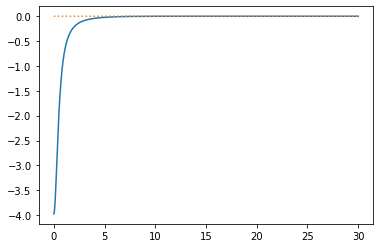

In [39]:
def plot_points_bad(L,N):
  npoints = len(L)
  points = np.linspace(0,N,npoints)
  plt.figure()
  plt.plot(points,L)
  plt.plot(points, [0]*npoints, linestyle=':')

plot_points_bad(L, 30)

## Módulo 15:
Plote então $\log (|Z(1/2+j1/2)|)$ (o log fará os zeros convergirem para  $-\infty$  permitindo as visualização  dos zeros:

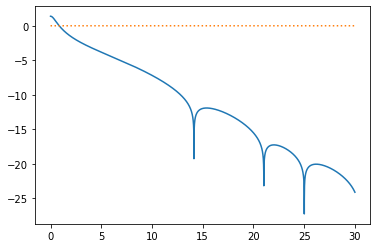

In [40]:
def plot_points(L, N):
    npoints = len(L)
    points = np.linspace(0, N, npoints)
    p = [mpmath.log(abs(i)) for i in L]
    plt.figure()
    plt.plot(points, p)
    plt.plot(points, [0]*npoints, linestyle=':')
plot_points(L, 30)

## Módulo 16:
Vizualizando com 100 zeros

In [41]:
argument_count(D_func, 100)

mpc(real='28.248036536895913', imag='-3.2332902529067346e-24')

In [42]:
argument_count(D_func, 100, maxdegree=9)

mpc(real='29.000000005970151', imag='-3.2332902529067346e-24')

In [43]:
L = compute_points(Z_func, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: You may need to increase the precision
  # This is added back by InteractiveShellApp.init_path()


In [44]:
L = compute_points(Z_func, 100, dps=50)
sign_changes(L)

29

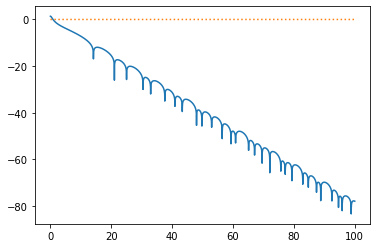

In [45]:
plot_points(L, 100)

# Equação de Ginzburg-Landau Equation

Escreva	a	Equação Complexa	de	Ginzburg-Landau	no	`Sympy` e	apresente	as	suas soluções.

<!-- _"The cubic complex Ginzburg-Landau equation (CGLe) is one of the most-studied nonlinear equations in the physics community. It describes on a qualitative, and often even on a quantitative level a vast variety of phenomena from nonlinear waves to second-order phase transitions, from superconductivity, superfluidity and Bose-Einstein conden- sation to liquid crystals and strings in field theory (Kuramoto, 1984, Cross and Hohenberg, 1993, Newell et al, 1993, Pismen, 1999, Bohr et al, 1998, Dangelmayr and Kramer, 1998)."_

_"Our goal is to give an overview of various phenomena described by the CGLe from the point of view of condensed matter physicists. Our approach is to study the relevant solutions to get insight into nonequilibrium phenomena in spatially extended systems. More elementary and detailed introductions into the concepts underlying the equation can be found in Manneville (1990), van Saarloos (1993), van Hecke et al (1994), Nicolis (1995) and Walgraaf (1997)."_ [Aranson	&	Kramer	Rev.	Mod.	Phys.,	2002](https://arxiv.org/abs/cond-mat/0106115) -->

$$
∂_tA = A + (1 + ib)∆A − (1 + ic)|A|^2A
$$

onde $\Delta$ representa a segunda deridava espacial de forma que a equação seja

$$
∂_tA = A + (1 + ib)∂^2_xA − (1 + ic)|A|^2A
$$



SEGUNDO [ESTA](https://www.uni-muenster.de/imperia/md/content/physik_tp/lectures/ss2017/numerische_Methoden_fuer_komplexe_Systeme_II/gle.pdf) REFERÊNCIA.
<!-- 
Vamos considerar a equação no formato sugeiro na refência 

$$
\frac{\partial}{\partial t}A = A + (1+i\alpha) \frac{\partial^2}{\partial x^2}A - (1+i\beta) |A|^2 A
$$ -->




NameError: ignored

In [2]:
#Importando as Bibliotecas
from sympy import *
from mpmath import *
import numpy as np

#Definindo as Variaveis
t, x, b, c, A = symbols('t x b c A') 
#i = (-1)**(0.5)

In [18]:
#Equação da referência 
A = A_0*e**(j*q*x+j*w*t)

A_0 = (1-q**2)**0.5
w = -alpha*q**2-beta*A_0**2

In [25]:
# Refência da Aula
def senh(var):
  return 2/(e**var+e**(-var))
A = A_0 * senh(t/tau)**(1+j*beta)

In [9]:
display(A.diff(x,x))

0

In [3]:

left_hand = A.diff(t)
rigth_hand = (A+(1+j*b*A.diff(x,x))-(1+j*c)*Abs(A)**2*A)

In [5]:
print('\n Left hand \n')
display(left_hand )
print('\n rigth hand \n')
display(rigth_hand)


 Left hand 



0


 rigth hand 



-A*(1.0*I*c + 1)*Abs(A)**2 + A + 1

In [10]:
left_hand == rigth_hand

False

In [45]:
display(mod(A))

NameError: ignored

$$
\cosh(t) =  {e^{t}+e^{-t} \over 2}
$$

$$
\operatorname{sech} (t)={1 \over {\cosh(t)}}
$$

$$
\operatorname{sech} (t)={1 \over {e^{t}+e^{-t} \over 2}}
$$

$$
\operatorname {sech} (t)={2 \over e^{t}+e^{-t}}
$$    

In [38]:
display(A)

0.648054273663885*A_0*t/x

# Referências 

* https://omz-software.com/pythonista/sympy/modules/mpmath/functions/hyperbolic.html